In [1]:
# Loading housing dataset
import pandas as pd


In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


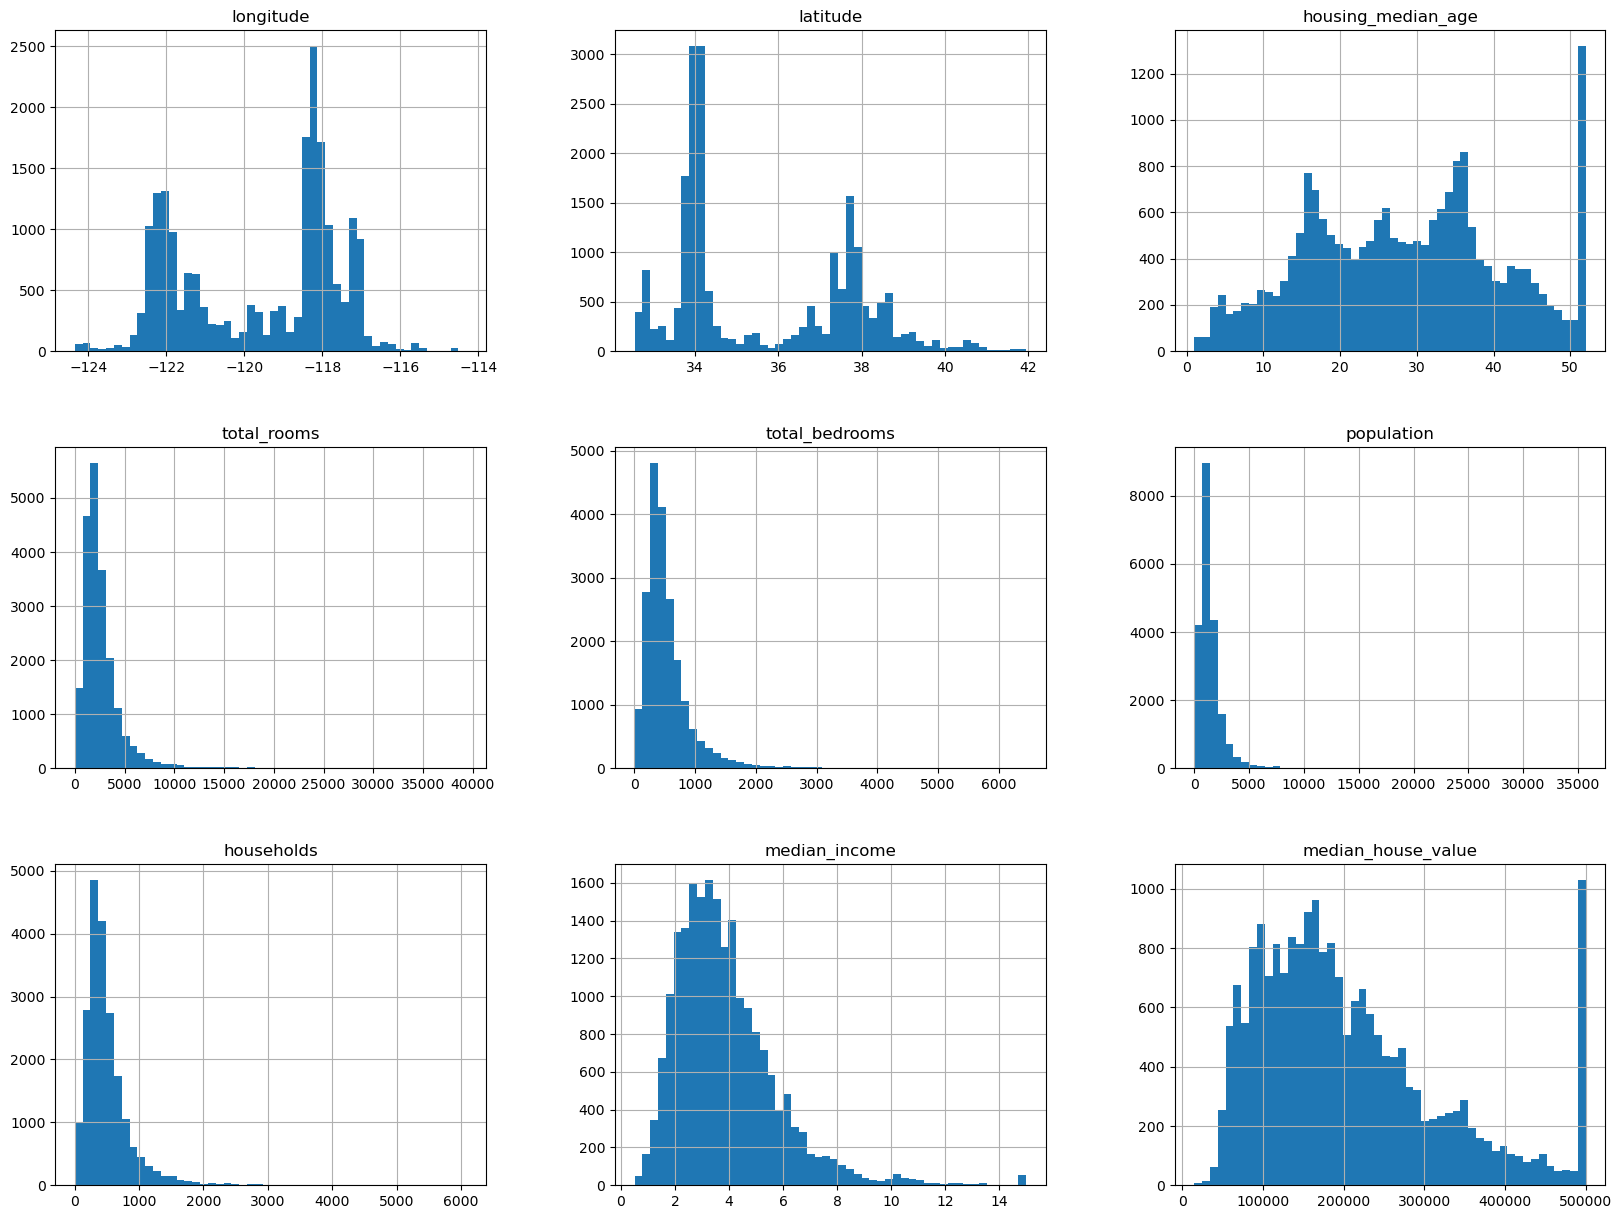

In [7]:
# visualize housing dataset
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Splitting our dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=13)

In [10]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2973,-119.08,35.34,15.0,1474.0,235.0,768.0,238.0,4.1528,130100.0,INLAND
14432,-117.23,32.80,21.0,2429.0,579.0,1011.0,538.0,3.2250,229400.0,NEAR OCEAN
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND
18848,-122.37,41.41,28.0,1729.0,419.0,929.0,370.0,1.2700,53100.0,INLAND
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0,INLAND


In [11]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [12]:
# stratified sampling
import numpy as np

<Axes: >

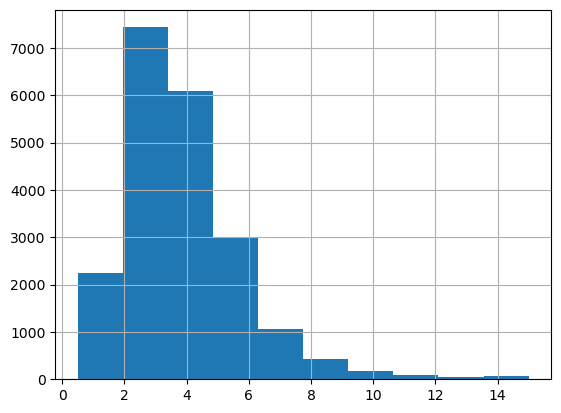

In [13]:
housing["median_income"].hist()

In [14]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

C:\Users\3BSALAM\AppData\Local\Temp\ipykernel_24856\3456074281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [15]:
housing["income_cat"].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

<Axes: >

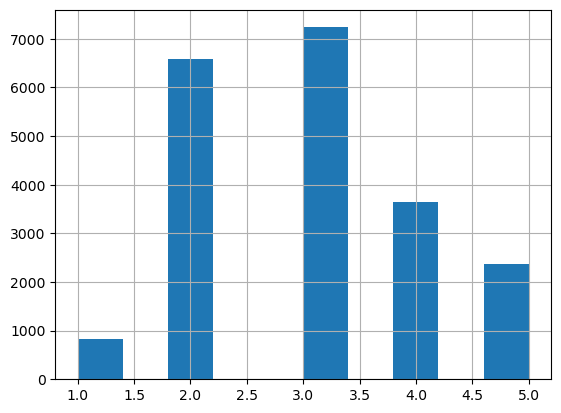

In [16]:
housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
len(strat_test_set)

4128

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [20]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

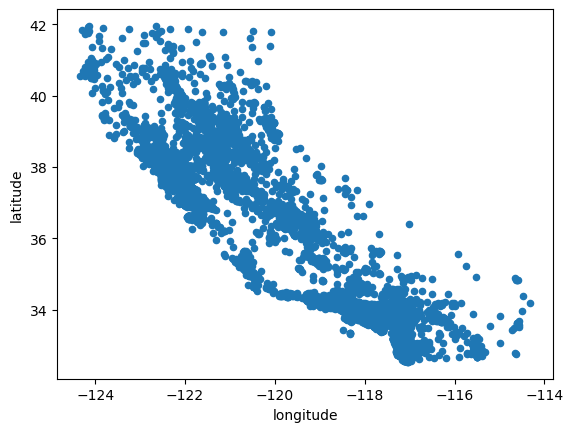

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

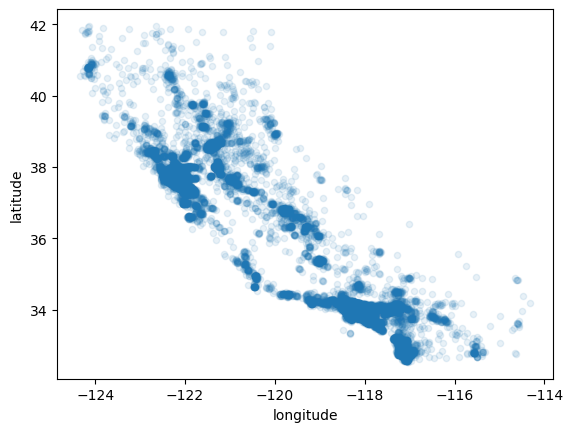

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

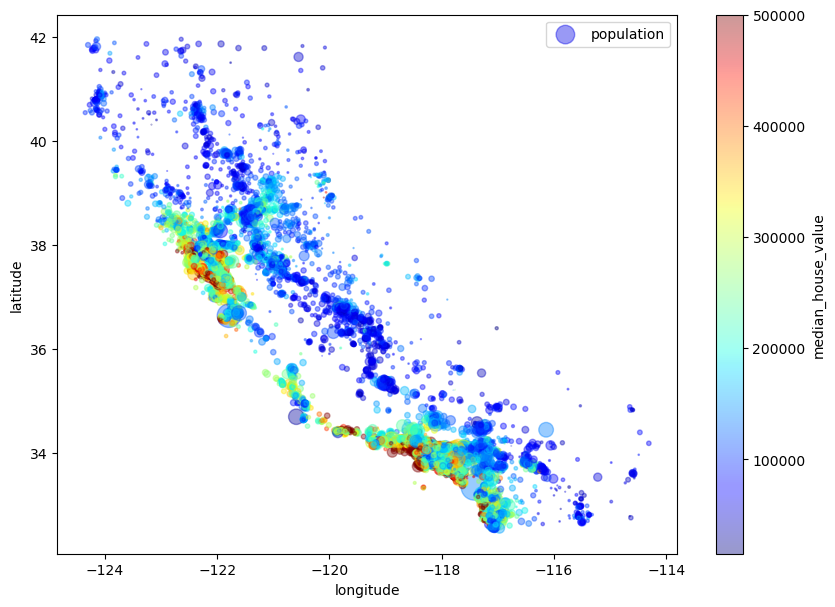

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

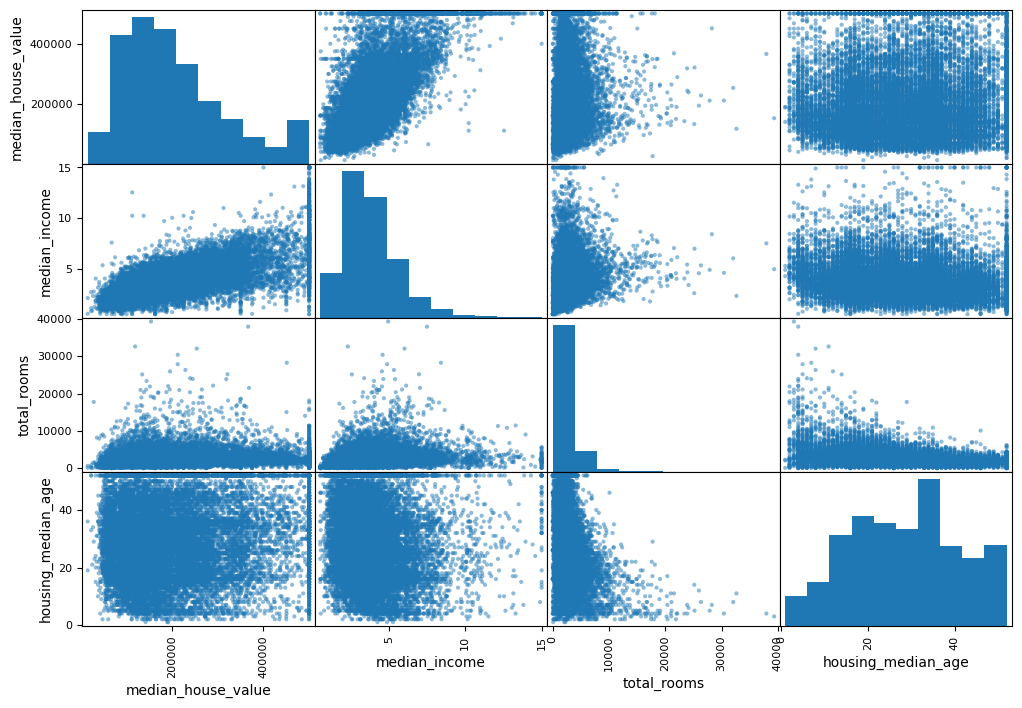

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

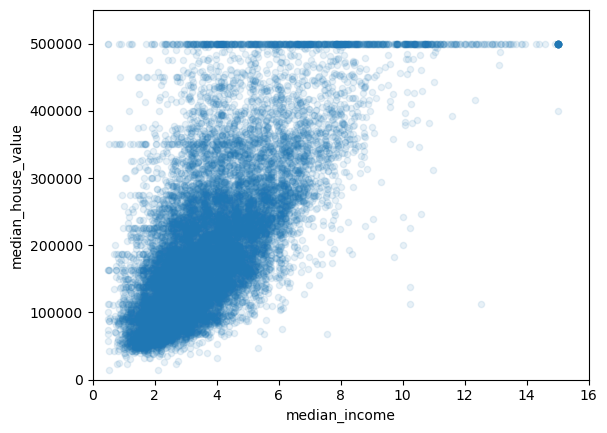

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

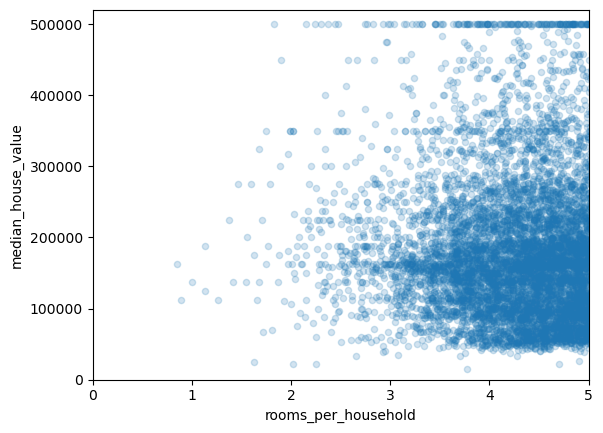

In [30]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the data for Machine Learning algorithms

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12101,-117.34,33.94,13.0,7910.0,NaN,3382.0,1176.0,5.5563,INLAND
14173,-117.05,32.75,36.0,2024.0,NaN,1030.0,390.0,3.8233,NEAR OCEAN
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,NEAR BAY
18246,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,NEAR BAY
20125,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,<1H OCEAN


In [33]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12101,-117.34,33.94,13.0,7910.0,3382.0,1176.0,5.5563,INLAND
14173,-117.05,32.75,36.0,2024.0,1030.0,390.0,3.8233,NEAR OCEAN
1493,-122.01,37.94,23.0,3741.0,1339.0,499.0,6.7061,NEAR BAY
18246,-122.08,37.39,4.0,2292.0,1050.0,584.0,4.8036,NEAR BAY
20125,-118.80,34.41,45.0,1610.0,1148.0,347.0,2.7000,<1H OCEAN


In [35]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

C:\Users\3BSALAM\AppData\Local\Temp\ipykernel_24856\3907893688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12101,-117.34,33.94,13.0,7910.0,433.0,3382.0,1176.0,5.5563,INLAND
14173,-117.05,32.75,36.0,2024.0,433.0,1030.0,390.0,3.8233,NEAR OCEAN
1493,-122.01,37.94,23.0,3741.0,433.0,1339.0,499.0,6.7061,NEAR BAY
18246,-122.08,37.39,4.0,2292.0,433.0,1050.0,584.0,4.8036,NEAR BAY
20125,-118.80,34.41,45.0,1610.0,433.0,1148.0,347.0,2.7000,<1H OCEAN


In [36]:
from sklearn.impute import SimpleImputer

In [37]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(
 |      *,
 |      missing_values=nan,
 |      strategy='mean',
 |      fill_value=None,
 |      copy=True,
 |      add_indicator=False,
 |      keep_empty_features=False
 |  )
 |
 |  Univariate imputer for completing missing values with simple strategies.
 |
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |
 |  Read more in the :ref:`User Guide <impute>`.
 |
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes w

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [39]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [40]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [41]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  433.    , 1166.    ,
        408.    ,    3.5394])

Check that this is the same as manually computing the median of each attribute:

In [42]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  433.    , 1166.    ,
        408.    ,    3.5394])

Transform the training set:

In [43]:
X = imputer.transform(housing_num)

In [44]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [45]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12101,-117.34,33.94,13.0,7910.0,433.0,3382.0,1176.0,5.5563
14173,-117.05,32.75,36.0,2024.0,433.0,1030.0,390.0,3.8233
1493,-122.01,37.94,23.0,3741.0,433.0,1339.0,499.0,6.7061
18246,-122.08,37.39,4.0,2292.0,433.0,1050.0,584.0,4.8036
20125,-118.80,34.41,45.0,1610.0,433.0,1148.0,347.0,2.7000


In [46]:
imputer.strategy

'median'

In [47]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.29,35.76,15.0,3938.0,789.0,3500.0,768.0,2.1295
1,-118.22,34.14,50.0,3657.0,708.0,1725.0,644.0,5.5456
2,-118.17,33.87,49.0,1937.0,445.0,1339.0,440.0,3.0319
3,-118.95,34.19,24.0,2719.0,434.0,1318.0,424.0,4.6750
4,-122.16,37.75,44.0,617.0,131.0,378.0,135.0,2.5568


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [48]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
3061,INLAND
4123,<1H OCEAN
7979,<1H OCEAN
20383,<1H OCEAN
373,NEAR BAY
2398,INLAND
19501,INLAND
7371,<1H OCEAN
16620,NEAR OCEAN
9956,INLAND


In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.],
       [1.],
       [0.],
       [4.],
       [1.]])

In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [53]:
housing_num_tr

array([[ 0.13887721,  0.06059886, -1.09190211, ...,  1.82516367,
         0.70737884, -0.91670931],
       [ 0.6735369 , -0.69784215,  1.69144483, ...,  0.2662207 ,
         0.38316829,  0.88325478],
       [ 0.698521  , -0.82424899,  1.61192063, ..., -0.0727945 ,
        -0.15021036, -0.4412292 ],
       ...,
       [ 0.79346057, -0.8804298 ,  0.65763025, ..., -0.56111692,
        -0.58684876, -0.27688717],
       [ 1.26316161, -1.40478409, -0.21713593, ..., -0.22473655,
        -0.26002361,  0.66711788],
       [-0.85548989,  1.09994396,  1.85049323, ..., -0.8852014 ,
        -0.85353809, -0.90964877]], shape=(16512, 8))

In [54]:
from sklearn.compose import ColumnTransformer

In [55]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [56]:
housing_prepared

array([[ 0.13887721,  0.06059886, -1.09190211, ...,  0.70737884,
        -0.91670931,  1.        ],
       [ 0.6735369 , -0.69784215,  1.69144483, ...,  0.38316829,
         0.88325478,  0.        ],
       [ 0.698521  , -0.82424899,  1.61192063, ..., -0.15021036,
        -0.4412292 ,  0.        ],
       ...,
       [ 0.79346057, -0.8804298 ,  0.65763025, ..., -0.58684876,
        -0.27688717,  0.        ],
       [ 1.26316161, -1.40478409, -0.21713593, ..., -0.26002361,
         0.66711788,  4.        ],
       [-0.85548989,  1.09994396,  1.85049323, ..., -0.85353809,
        -0.90964877,  1.        ]], shape=(16512, 9))

In [57]:
housing_prepared.shape

(16512, 9)

# Select and train a model 

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 56588.89653886 310147.65093714 207635.89194171 257298.44461308
 185108.22237914]


Compare against the actual values:

In [60]:
print("Labels:", list(some_labels))

Labels: [59800.0, 258100.0, 162800.0, 228800.0, 111100.0]


In [61]:
some_data_prepared

array([[ 0.13887721,  0.06059886, -1.09190211,  0.60064505,  0.60669485,
         1.82516367,  0.70737884, -0.91670931,  1.        ],
       [ 0.6735369 , -0.69784215,  1.69144483,  0.47193843,  0.41381222,
         0.2662207 ,  0.38316829,  0.88325478,  0.        ],
       [ 0.698521  , -0.82424899,  1.61192063, -0.31587435, -0.21246103,
        -0.0727945 , -0.15021036, -0.4412292 ,  0.        ],
       [ 0.30876907, -0.67443348, -0.37618433,  0.04230565, -0.23865497,
        -0.09123833, -0.19204398,  0.42453029,  0.        ],
       [-1.29521001,  0.99226406,  1.21429964, -0.92047485, -0.96017889,
        -0.9168194 , -0.94766373, -0.69156231,  3.        ]])

In [62]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(69310.50492409867)

In [63]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

50709.97243998163

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(housing_prepared, housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,13
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [65]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)